In [5]:
##Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
##Variables
nu=1e-6
mu=1e-3
rho=1e+3
dt=0.0001
gradP=0.375
u_avg=0.0125
nx=6
ny=3

In [7]:
Nx=2*nx+1
Ny=2*ny+1
L=0.04
H=0.02
h=L/Nx
L_sq=np.array([1.0,1.0])

In [8]:
x1=np.linspace(0, L, num=2*nx+1)
x2=np.linspace(0, H, num=2*ny+1)
xi=0.5*np.linspace(0, Nx, num=Nx+1)
xi=np.insert(xi, 0, -0.5)
xj=0.5*np.linspace(0, Ny, num=Ny+1)
xj=np.insert(xj, 0, -0.5)

In [9]:
def p_creator(xi,xj,Nx,Ny):
    xij=[]
    for i in range(len(xi)):
        for j in range(len(xj)):
            xij.append([xi[i],xj[j]])
    return np.array(xij)  
p=p_creator(xi,xj,Nx,Ny)

In [47]:
xj[2]

0.5

In [94]:
#### Functions

def BC_drich(vect,Nx,Ny,xi=xi,xj=xj,p=p):
    y=[xj[2],xj[Ny+1]]
    for i in xi[3:Nx-1]:
        if (i.is_integer()==True):
            ix1=np.argwhere((p[:,0]==i) & (  p[:,1]==xj[2]))[0][0]
            ix1b=np.argwhere((p[:,0]==i) & (  p[:,1]==xj[0]))[0][0]
            vect[ix1]=-vect[ix1b]
            
            ix2=np.argwhere((p[:,0]==i) & (  p[:,1]==xj[Ny-1]))[0][0]
            ix2u=np.argwhere((p[:,0]==i) & (  p[:,1]==xj[Ny+1]))[0][0]
            vect[ix2]=-vect[ix2u]
    return vect

def BC_period(vect,Nx,Ny,xi=xi,xj=xj,p=p):
    x1=[xi[1],xi[Nx-2]]    
    x2=[xi[3],xi[Nx]]
    for j in (xj[2:(2*ny-1)+4]):
        if (i.is_integer()==True):
            ix1=np.argwhere( (p[:,0]==x1[0]) & (p[:,1]==j) )[0][0]
            ix2=np.argwhere( (p[:,0]==x1[1]) & (p[:,1]==j) )[0][0]
            ix3=np.argwhere( (p[:,0]==x2[0]) & (p[:,1]==j) )[0][0]
            ix4=np.argwhere( (p[:,0]==x2[0]) & (p[:,1]==j) )[0][0]
            vect[ix1]=vect[ix2]
            vect[ix3]=vect[ix4]
    return vect

In [53]:
[xi[1],xi[Nx-2]]    

[0.0, 5.0]

In [52]:
(xj[2:(2*ny-1)+4])

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

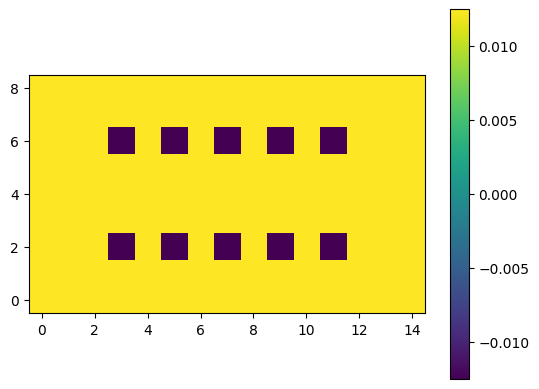

In [95]:
un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
qo= BC_drich(un,Nx,Ny)
un_actual=qo.reshape((Nx+2,Ny+2))
plt.imshow(np.flipud(un_actual.T),origin='lower')
plt.colorbar()
# s=pd.DataFrame(np.flipud(un_actual.T))
# s.columns=(s.columns/2) -0.5
# s.index=(s.index/2) -0.5
# s = s.iloc[::-1]
# s.loc[3.5]=0
# s.loc[-0.5]=0


In [93]:
s[]

,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
3.5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
2.5,0.0125,0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,0.0125,0.0125
2.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
0.5,0.0125,0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,0.0125,0.0125
0.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
-0.5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [89]:
s.loc[-0.5]=0

In [90]:
s

,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
3.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
3.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
2.5,0.0125,0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,0.0125,0.0125
2.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1.5,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
0.5,0.0125,0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,-0.0125,0.0125,0.0125,0.0125
0.0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
-0.5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [12]:
def GenPointer(Nx, Ny):
    iu = np.nan*np.ones((nx,ny))
    xi=0.5*np.linspace(0, Nx+1, num=Nx+2)
    xi=np.insert(np.insert(xi, 0, -0.5),0,-1)
    xj=0.5*np.linspace(0, Ny+1, num=Ny+2)
    xj=np.insert(np.insert(xj, 0, -0.5),0,-1)
    ## Memory allocation
    id_u = 0  # index to be used in vector variable u = [ux; uy]
    for i in xi:
        for j in xj:
            iu[i, j] = id_u
            id_u = id_u + 1


In [14]:
###
def iu(i,j,p=p):
    ix=np.argwhere((p[:,0]==i) & (  p[:,1]==j))[0][0]
    return ix

In [46]:
def diff(iu,un):
    #qo = np.nan*np.ones((len(un)))
    qo = np.zeros((len(un)))
    for i in xi[3:Nx-1]:
        for j in xj[2:Ny-1]:
            if (i.is_integer()==True and j.is_integer()==False):
                qo[iu(i,j)] = (1/(h**2))*(un[iu(i+1,j)]+un[iu(i-1,j)]+un[iu(i,j+1)]+un[iu(i,j-1)]-4*un[iu(i,j)])
                print( qo[iu(i,j)])
    return qo

In [20]:
un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
# un_actual=un.reshape((Nx+2,Ny+2))
# plt.imshow(np.flipud(un_actual.T),origin='lower')
# plt.colorbar()
# pd.DataFrame(np.flipud(un_actual.T))

In [22]:
i=1
j=0.5

In [26]:
xi

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
        5. ,  5.5,  6. ,  6.5])

In [27]:
xj

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5])

In [45]:
un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
qo = np.zeros((len(un)))
bi=0
for i in xi[5:Nx-3]:
    for j in xj[3:Ny-1]:
        if (i.is_integer()==True and j.is_integer()==False):
            mult=(un[iu(i+1,j)]+un[iu(i-1,j)]+un[iu(i,j+1)]+un[iu(i,j-1)]-4*un[iu(i,j)])
            print(i,j)
            qo[iu(i,j)] = (1/(h**2))*mult

2.0 1.5
3.0 1.5
4.0 1.5


In [42]:
xi[5:Nx-3]

array([2. , 2.5, 3. , 3.5, 4. ])

In [ ]:
ix=np.argwhere((p[:,0]==1.5) & (  p[:,1]==j))]

In [ ]:
i+1

In [ ]:
(0%2==0 and 1%2!=0)

In [ ]:
1%2!=0

In [ ]:
0%2==0

In [ ]:
un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
us=np.zeros(((Nx+2)*(Ny+2) ))
un1=np.zeros(((Nx+2)*(Ny+2) ))
un_actual=un.reshape((Nx+2,Ny+2))

In [ ]:
#un=u_avg*np.ones(((Nx+2)*(Ny+2) ))
us=us+dt*diff(iu,us)

In [ ]:
us

In [ ]:
for f in range(10):
#predictor step:
    us=un+dt*diff(iu,un)
    #us=BC_drich(us,Nx,Ny)
    #us=BC_period(us,Nx,Ny)
    #corrector step:
    # ci=0
    # cj=0
    # for i in xi[3:Nx-1]:
    #     for j in xj[2:Ny-1]:
    #         print(ci,cj)
    #         if (cj%2==0 & ci%2!=0):
    #             un1[iu(i,j)]=us[iu(i,j)]-(1/rho)*(dt)*(gradP)
    #             print(un1)
    #         cj=cj+1
    #     ci=ci+1
    # un1=BC_drich(un1,Nx,Ny)
    # un1=BC_period(un1,Nx,Ny)
    # un=un1
un_actual=un.reshape((Nx+2,Ny+2))

In [ ]:
#us=diff(iu,un)
un_actual=us.reshape((Nx+2,Ny+2))
plt.imshow(np.flipud(un_actual.T),origin='lower')
plt.colorbar()

In [ ]:
pd.DataFrame(np.flipud(un_actual.T))

In [ ]:
un.shape

In [ ]:
(Nx+4)*(Ny+4)